In [1]:
import pandas as pd

In [2]:
RS1 = pd.read_csv('/users/ritwikchakradhar/Downloads/SvR1.csv')

In [3]:
RS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   1591 non-null   int64
 1   rpm     1591 non-null   int64
dtypes: int64(2)
memory usage: 25.0 KB


In [4]:
RS1.describe()

,speed,rpm
count,1591.000000,1591.000000
mean,40.372093,1036.294155
std,17.376477,296.676492
min,0.000000,509.000000
25%,32.500000,602.000000
50%,46.000000,1116.000000
75%,53.000000,1255.000000
max,70.000000,1846.000000


In [5]:
RS1.corr()

,speed,rpm
speed,1.000000,0.098285
rpm,0.098285,1.000000


In [434]:
RS1_Train = RS1[:1300]
RS1_Train_scaled = scale.transform(RS1_Train)

In [435]:
RS1_Test = RS1[1300:]
RS1_Test_scaled = scale.transform(RS1_Test)

In [436]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

<AxesSubplot:xlabel='speed', ylabel='rpm'>

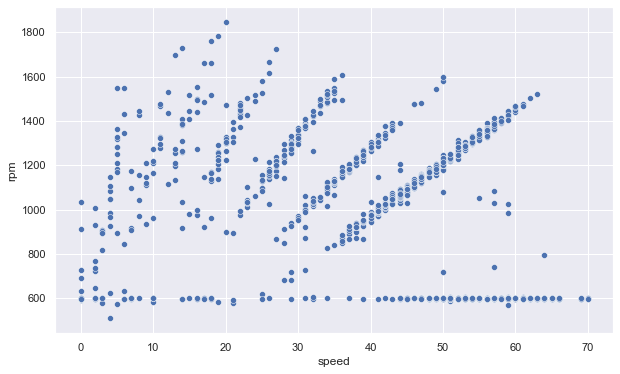

In [437]:
plt.figure(figsize = (10,6))
sns.scatterplot(x=RS1['speed'], y = RS1['rpm'])

In [438]:
from sklearn.cluster import KMeans
kmeans = KMeans(6, random_state=0)

In [439]:
labels = kmeans.fit(RS1).predict(RS1)

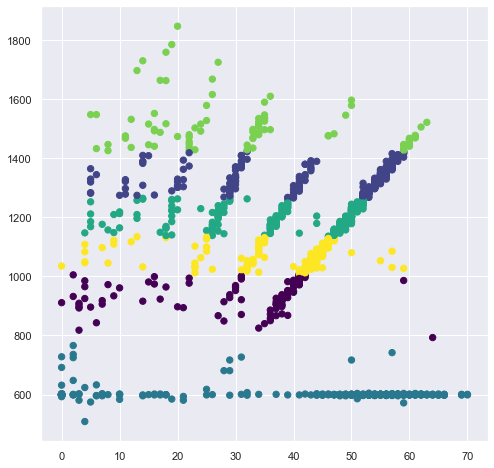

In [440]:
plt.figure(figsize=(8,8))
plt.scatter(RS1['speed'], RS1['rpm'], c=labels, s=40, cmap='viridis');


In [441]:
from sklearn.mixture import gmm

ImportError: cannot import name 'gmm' from 'sklearn.mixture' (/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/mixture/__init__.py)

In [442]:
from sklearn.cluster import AffinityPropagation

In [443]:
APmod = AffinityPropagation(damping = 0.9)

In [444]:
APmod.fit(RS1)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


AffinityPropagation(damping=0.9)

In [445]:
RS1_AP_predict = APmod.predict(RS1)

In [446]:
clusters = set(RS1_AP_predict)

In [447]:
print(clusters)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}


In [448]:
from sklearn import mixture

In [449]:
RS1_GM = mixture.BayesianGaussianMixture(
    n_components=6, covariance_type='full', weight_concentration_prior=1e-5,
    weight_concentration_prior_type='dirichlet_distribution',
    mean_precision_prior=1e-30, covariance_prior=1e-30 * np.eye(2),
    init_params="kmeans", max_iter=300, random_state=2)

In [450]:
RS1_GM_Predict = RS1_GM.fit(RS1_Train)

In [451]:
labels = RS1_GM_Predict.predict(RS1_Train)

<AxesSubplot:xlabel='speed', ylabel='rpm'>

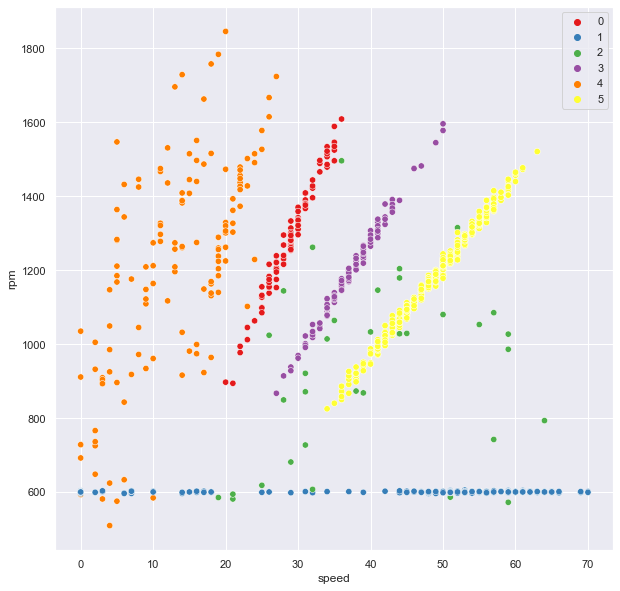

In [452]:
plt.figure(figsize = (10,10))
sns.scatterplot(x=RS1_Train['speed'], y=RS1_Train['rpm'], palette = 'Set1', hue = labels, c = labels, s=40, cmap = 'viridis')

<AxesSubplot:xlabel='speed', ylabel='rpm'>

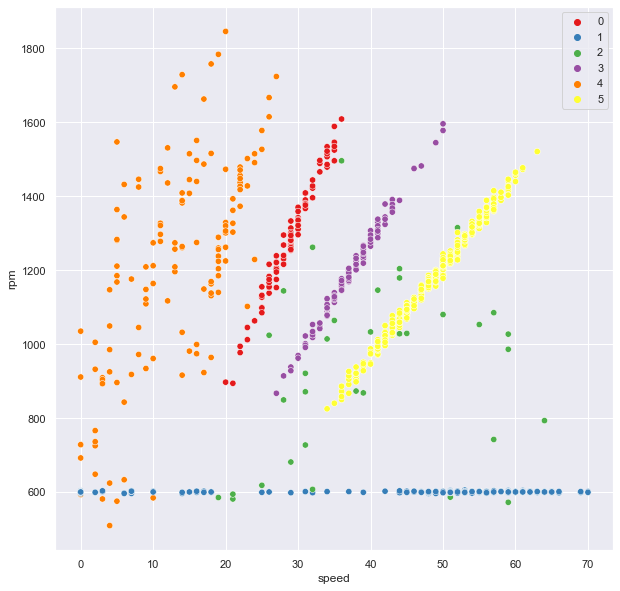

In [453]:
plt.figure(figsize = (10,10))
sns.scatterplot(x=RS1_Train['speed'], y=RS1_Train['rpm'], palette = 'Set1', hue = labels, c = labels, s=40, cmap = 'viridis')

In [384]:
print(labels)

[3 0 0 ... 1 1 1]


In [385]:
print(set(labels))

{0, 1, 2, 3, 4, 5}


In [386]:
RS1_Test_Predict = RS1_GM_Predict.predict(RS1_Test)

<AxesSubplot:xlabel='speed', ylabel='rpm'>

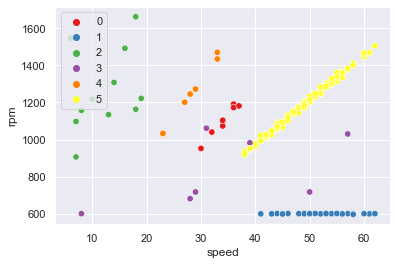

In [387]:
sns.scatterplot(x=RS1_Test['speed'], y=RS1_Test['rpm'], hue = RS1_Test_Predict, palette = 'Set1', c = RS1_Test_Predict, s=40, cmap = 'viridis')

In [454]:
RS2 = pd.read_csv('/users/ritwikchakradhar/Downloads/SVR2 - Sheet1.csv')

In [455]:
RS2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2629 entries, 0 to 2628
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   2629 non-null   int64
 1   rpm     2629 non-null   int64
dtypes: int64(2)
memory usage: 41.2 KB


In [456]:
RS2_Train = RS2[:2000][RS2[:2000]['speed']>10]
RS2_Test = RS2[2000:][RS2[2000:]['speed']>10]

In [457]:
from sklearn.preprocessing import StandardScaler

In [458]:
scale = StandardScaler()

scale.fit(RS2_Train)
RS2_Train_scaled = scale.transform(RS2_Train)
RS2_Test_scaled = scale.transform(RS2_Test)

In [459]:
RS2_Fit = RS1_GM.fit(RS2_Train)

In [460]:
RS2_Fit_Predict = RS2_Fit.predict(RS2_Train)

<AxesSubplot:xlabel='speed', ylabel='rpm'>

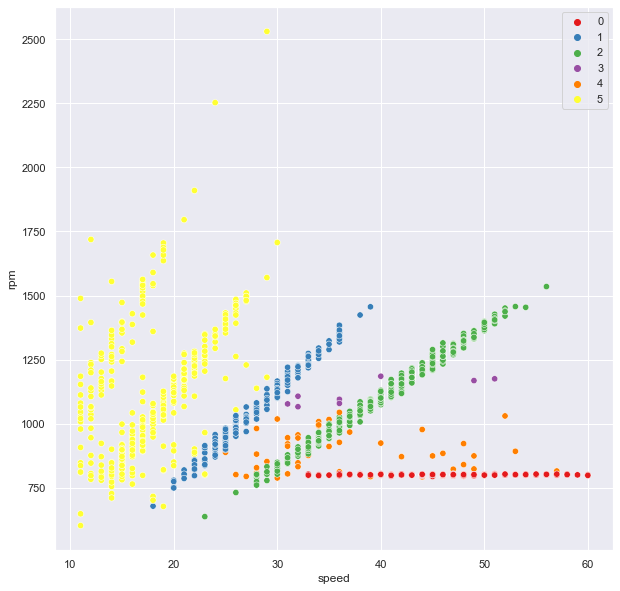

In [461]:
plt.figure(figsize = (10,10))
sns.scatterplot(x=RS2_Train['speed'], y=RS2_Train['rpm'], hue = RS2_Fit_Predict, palette = 'Set1', s=40, cmap = 'viridis')

<AxesSubplot:xlabel='speed', ylabel='rpm'>

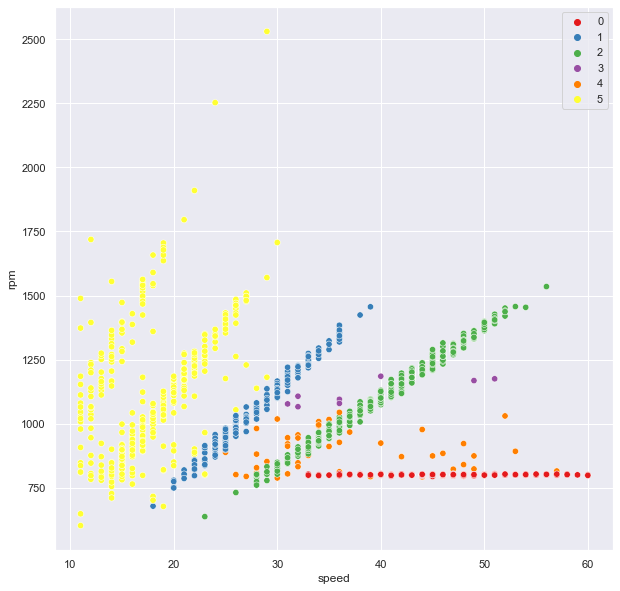

In [462]:
plt.figure(figsize = (10,10))
sns.scatterplot(x=RS2_Train['speed'], y=RS2_Train['rpm'], hue = RS2_Fit_Predict, palette = 'Set1', s=40, cmap = 'viridis')

In [471]:
RS2_Test_Predict = RS2_Fit.predict(RS2_Test)

<AxesSubplot:xlabel='speed', ylabel='rpm'>

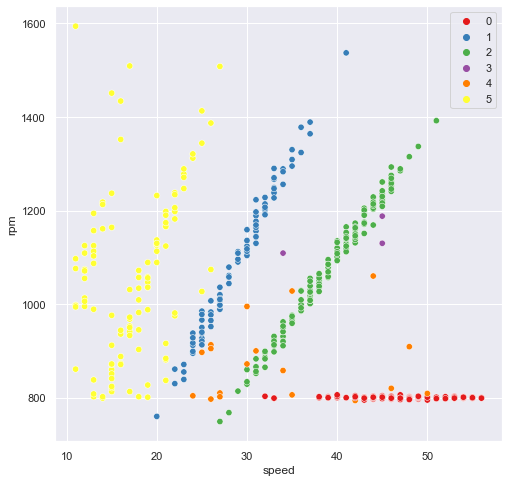

In [472]:
plt.figure(figsize = (8,8))
sns.scatterplot(x=RS2_Test['speed'], y=RS2_Test['rpm'], hue = RS2_Test_Predict, palette = 'Set1', c = RS1_Test_Predict, s=40, cmap = 'viridis')

In [473]:
print(RS2_Fit.predict([2],[200]))

TypeError: predict() takes 2 positional arguments but 3 were given

In [474]:
import numpy as np
x = np.array(RS1['speed'])

In [475]:
y = np.array(RS1['rpm'])

<AxesSubplot:>

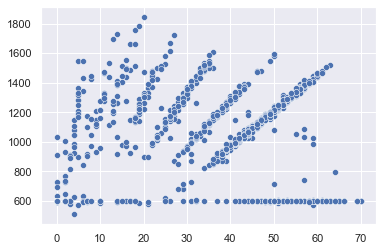

In [476]:
sns.scatterplot(x=x, y=y)

In [477]:
regress = np.poly1d(np.polyfit(x,y,85))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [478]:
sns.lineplot(regress)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Shape of passed values is (84, 1), indices imply (83, 1)

In [479]:
print(regress)

             83              82              81              80
-1.417e-140 x  + 5.613e-139 x  + 6.341e-137 x  + 3.092e-135 x 
               79              78              77              76
 + 4.788e-134 x  - 7.629e-132 x  - 1.025e-129 x  - 8.176e-128 x 
               75              74              73             72
 - 4.869e-126 x  - 2.038e-124 x  - 2.121e-123 x  + 6.82e-121 x 
               71              70              69             68
 + 9.305e-119 x  + 8.254e-117 x  + 5.842e-115 x  + 3.37e-113 x 
               67              66              65             64
 + 1.439e-111 x  + 1.996e-110 x  - 4.379e-108 x  - 6.49e-106 x 
               63             62              61             60
 - 6.108e-104 x  - 4.61e-102 x  - 2.897e-100 x  - 1.444e-98 x 
              59             58             57            56
 - 4.278e-97 x  + 1.598e-95 x  + 4.125e-93 x  + 4.47e-91 x 
              55            54             53             52
 + 3.668e-89 x  + 2.47e-87 x  + 1.335e-85 x  +

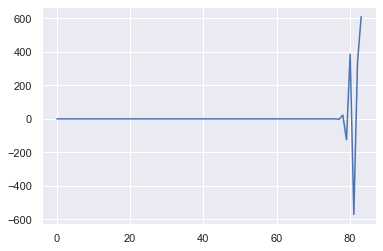

In [480]:
plt.plot(regress)

In [481]:
from sklearn.metrics import r2_score

In [482]:
r2 = r2_score(y, regress(x))

In [483]:
print(r2)

0.27393215431320206


In [484]:
y = labels

In [485]:
from sklearn.preprocessing import StandardScaler

In [486]:
scale = StandardScaler()

In [487]:
import statsmodels.api as sm

In [488]:
RS1_Scaled_Train = scale.fit_transform(RS1_Train[['speed','rpm']])

In [489]:
RS1_Scaled_Train

array([[ 0.19475921,  0.55506946],
       [ 0.07694303,  1.0210432 ],
       [-0.09978124,  0.65159259],
       ...,
       [ 1.07838058, -1.45860279],
       [ 0.9605644 , -1.4552744 ],
       [ 1.07838058, -1.4552744 ]])

In [490]:
MultipleRegressPrediction = sm.OLS(y,RS1_Scaled_Train).fit()

In [491]:
print(MultipleRegressPrediction.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.088
Model:                            OLS   Adj. R-squared (uncentered):              0.087
Method:                 Least Squares   F-statistic:                              62.59
Date:                Sun, 11 Apr 2021   Prob (F-statistic):                    1.12e-26
Time:                        16:08:37   Log-Likelihood:                         -3500.2
No. Observations:                1300   AIC:                                      7004.
Df Residuals:                    1298   BIC:                                      7015.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [492]:
RS1_Scaled_Test = scale.fit_transform(RS1_Test[['speed','rpm']])

In [493]:
MRprediction = MultipleRegressPrediction.predict(RS1_Scaled_Test)

In [494]:
print(MRprediction)

[-1.26717515 -1.24628016  2.18988926  1.48168721  1.53295718  1.62219588
  1.51397282  1.3127142   1.1968974   1.15701804  1.03551813  0.90260321
  0.78678641  0.79438016  0.85704074  0.84565013 -1.39636637 -1.33177076
 -1.2804764   1.93547443  1.76459078  1.64497711  1.55573842  1.47029659
  1.35827667  1.26715173  1.11525245  0.59312153  0.43933601  0.6178134
  0.82286889  1.05829936  0.8760251   0.84185325  0.96906067  0.83425951
  0.60451215  0.13365121  0.01403753 -0.10177927  0.55312023  1.56115323
  0.62136636 -0.28424865  2.0336809  -0.29963127 -0.05655827 -1.02483387
 -1.36628408 -0.32961599 -0.44163592  0.30073798  0.34250357  0.33490983
  0.31401483  0.23048364  0.18871805 -0.07899803 -0.38847971  0.15442424
 -0.45692097  0.65578212  0.95007631  1.0810806   1.03551813  0.8019739
  0.64818838  0.74122394  0.9918419   1.17791304  1.2709486  -1.38686199
 -1.3602595   1.48928096  1.36398417  1.52156656  1.42093725  1.47980097
  1.43992162  1.52536344  1.4760041   1.26903797  1.0

In [495]:
print(labels)

[2 3 3 ... 1 1 1]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

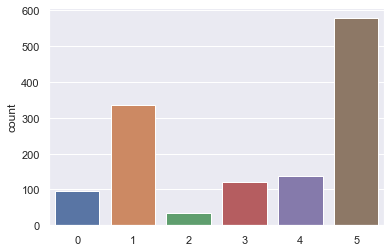

In [496]:
sns.countplot(labels)

In [497]:
MRprediction_train = MultipleRegressPrediction.predict(RS1_Scaled_Train)

In [498]:
print(MRprediction_train)

[ 0.65040403  1.10516087  0.6569805  ... -1.19332384 -1.22801831
 -1.18980261]


In [499]:
RS3 = pd.read_csv('/users/ritwikchakradhar/Downloads/SpeedRPM_3.csv')

In [500]:
RS3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053 entries, 0 to 2052
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   2053 non-null   int64  
 1   rpm     2048 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 32.2 KB


In [501]:
RS3.describe()

,speed,rpm
count,2053.000000,2048.000000
mean,35.545056,1120.079102
std,17.006579,341.689787
min,0.000000,234.000000
25%,24.000000,899.750000
50%,40.000000,1174.500000
75%,49.000000,1328.000000
max,70.000000,2325.000000


In [502]:
RS3.isnull().sum()

speed    0
rpm      5
dtype: int64

In [503]:
RS3_train = RS3[:1500]

In [504]:
RS3_test = RS3[1500:]

In [505]:
RS3_Train_Predict = RS1_GM.fit(RS3_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [506]:
RS3.dropna(axis=1)

,speed
0,0
1,0
2,0
3,0
4,0
...,...
2048,0
2049,0
2050,0
2051,0


In [507]:
RS3 = RS3.dropna(axis=0)

In [508]:
RS3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2051
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   2048 non-null   int64  
 1   rpm     2048 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 48.0 KB


In [509]:
RS3_Train = RS3[:1500]

In [510]:
RS3_Test = RS3[1500:]

In [511]:
RS3_Train_Predict = RS1_GM.fit(RS3_Train)
RS3_Train_prediction = RS1_GM.predict(RS3_Train)

In [512]:
RS3_Test_Predict = RS3_Train_Predict.predict(RS3_Test)

<AxesSubplot:xlabel='speed', ylabel='rpm'>

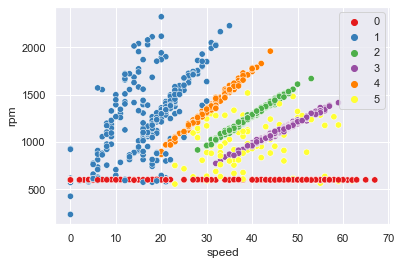

In [513]:
sns.scatterplot(x=RS3_Train['speed'], y=RS3_Train['rpm'], hue = RS3_Train_prediction, palette = 'Set1', c = RS1_Test_Predict, s=40, cmap = 'viridis')

<AxesSubplot:xlabel='speed', ylabel='rpm'>

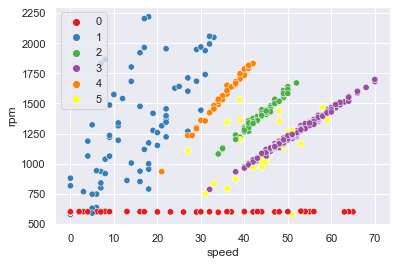

In [514]:

sns.scatterplot(x=RS3_Test['speed'], y=RS3_Test['rpm'], hue = RS3_Test_Predict, palette = 'Set1', c = RS1_Test_Predict, s=40, cmap = 'viridis')

In [515]:
RS4 = pd.read_csv('/users/ritwikchakradhar/Downloads/SpeedRPM_4.csv')

In [516]:
RS4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   2341 non-null   int64
 1   rpm     2341 non-null   int64
dtypes: int64(2)
memory usage: 36.7 KB


In [517]:
RS4_Train = RS4[:1800]

In [518]:
RS4_Test = RS4[1800:]

In [519]:
RS4_Train_Predict = RS1_GM.fit(RS4)

In [520]:
RS4_Train_Prediction = RS4_Train_Predict.predict(RS4_Train) 

<AxesSubplot:xlabel='speed', ylabel='rpm'>

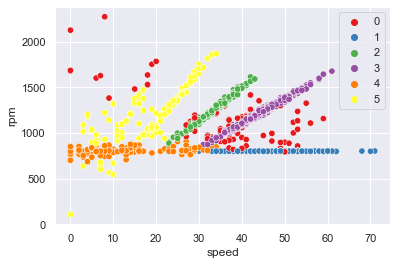

In [521]:

sns.scatterplot(x=RS4_Train['speed'], y=RS4_Train['rpm'], hue = RS4_Train_Prediction, palette = 'Set1', c = RS4_Train_Prediction, s=40, cmap = 'viridis')

In [522]:
RS4_Test_Prediction = RS4_Train_Predict.predict(RS4_Test) 

<AxesSubplot:xlabel='speed', ylabel='rpm'>

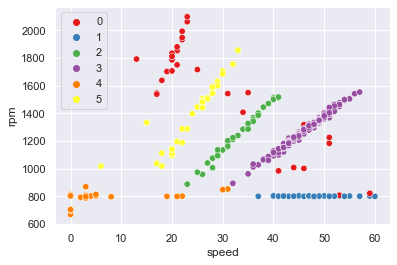

In [523]:
sns.scatterplot(x=RS4_Test['speed'], y=RS4_Test['rpm'], hue = RS4_Test_Prediction, palette = 'Set1', c = RS4_Test_Prediction, s=40, cmap = 'viridis')

In [524]:
MM1 = pd.read_csv('/users/ritwikchakradhar/Downloads/Mahindra3978 - Sheet1.csv')

In [593]:
MM1_Predict = RS1_GM.fit(MM1)

In [594]:
MM1_Prediction = MM1_Predict.predict(MM1)

<AxesSubplot:xlabel='speed', ylabel='rpm'>

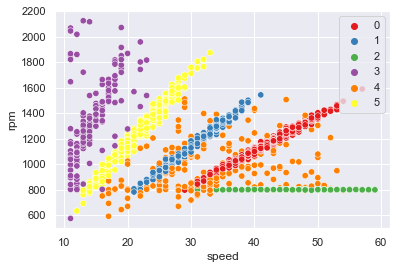

In [595]:
sns.scatterplot(x=MM1['speed'], y=MM1['rpm'], hue = MM1_Prediction, palette = 'Set1', c = MM1_Prediction, s=40, cmap = 'viridis')

In [596]:
MM1 = MM1[MM1['speed']>3]

In [597]:
MM1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2574 entries, 0 to 2998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   2574 non-null   int64
 1   rpm     2574 non-null   int64
dtypes: int64(2)
memory usage: 60.3 KB


In [598]:
MM2 = pd.read_csv('/users/ritwikchakradhar/Downloads/Mahindra3977 - Sheet1.csv')

In [599]:
MM2_Prediction = MM1_Predict.predict(MM2)

<AxesSubplot:xlabel='speed', ylabel='rpm'>

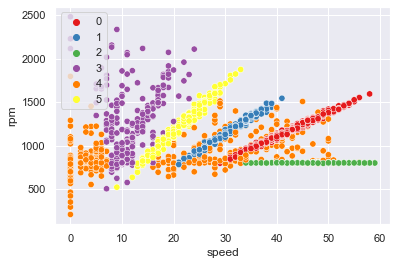

In [600]:
sns.scatterplot(x=MM2['speed'], y=MM2['rpm'], hue = MM2_Prediction, palette = 'Set1', c = MM2_Prediction, s=40, cmap = 'viridis')

In [601]:
MM3 = pd.read_csv('/users/ritwikchakradhar/Downloads/Mahindra8216 - Sheet1.csv')

In [602]:
MM3_Prediction = MM1_Predict.predict(MM3)

<AxesSubplot:xlabel='speed', ylabel='rpm'>

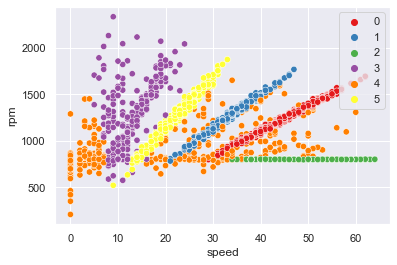

In [603]:
sns.scatterplot(x=MM3['speed'], y=MM3['rpm'], hue = MM3_Prediction, palette = 'Set1', c = MM3_Prediction, s=40, cmap = 'viridis')

In [604]:
MM4 = pd.read_csv('/users/ritwikchakradhar/Downloads/Mahindra8217 - Sheet1.csv')

In [605]:
MM4_Prediction = MM1_Predict.predict(MM4)

<AxesSubplot:xlabel='speed', ylabel='rpm'>

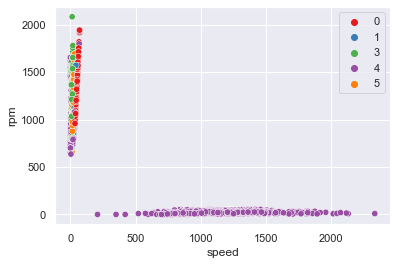

In [591]:
sns.scatterplot(x=MM4['speed'], y=MM4['rpm'], hue = MM4_Prediction, palette = 'Set1', c = MM4_Prediction, s=40, cmap = 'viridis')